<a href="https://colab.research.google.com/github/ankitdv98/Breast-Cancer-Prediction/blob/master/App_Behavior_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from dateutil import parser


In [77]:
dataset= pd.read_csv('appdata10.csv')

In [78]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [79]:
dataset.shape

(50000, 12)

In [80]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
#Hour column is string converting to int
dataset['hour']= dataset['hour'].str.slice(1,3).astype(int)

In [82]:
dataset.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


# **Data Visualisation**

In [83]:
#Visualising Numerical Columns
dataset_temp= dataset.drop(columns= ['user', 'first_open', 'screen_list', 'enrolled_date', 'enrolled'], axis= 1)
dataset_temp.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


In [84]:
np.size(dataset_temp['age'].unique())

78

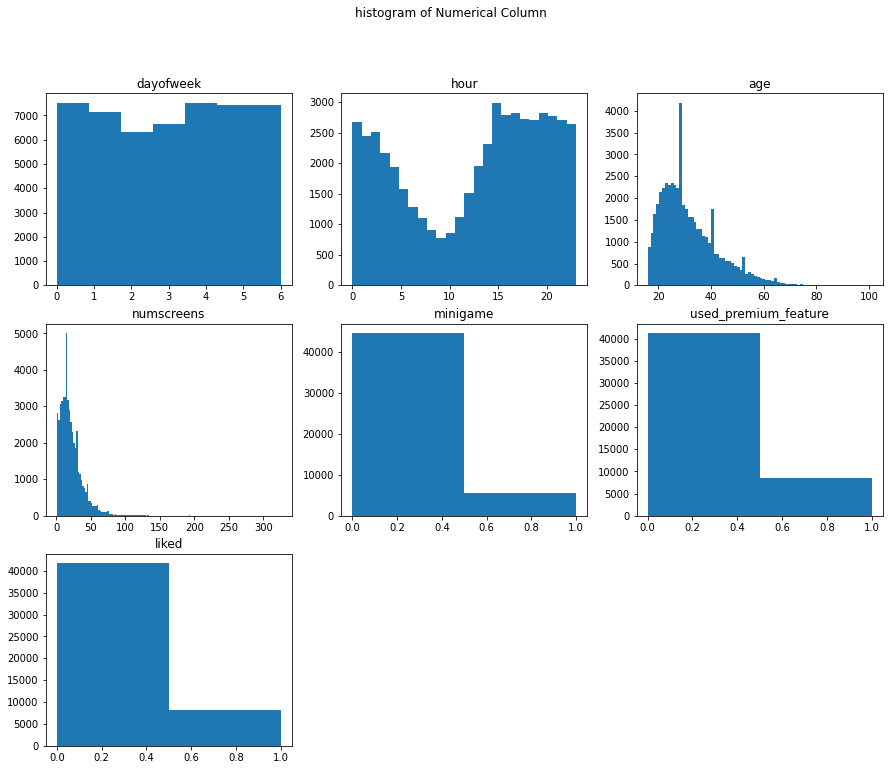

In [85]:
#histograms
plt.figure(figsize=(15, 12))
plt.suptitle("histogram of Numerical Column")
for i in range(1, dataset_temp.shape[1]+1):
  plt.subplot(3, 3, i)
  f= plt.gca()
  f.set_title(dataset_temp.columns[i-1])

  val= np.size(dataset_temp.iloc[:, i-1].unique())
  plt.hist(dataset_temp.iloc[:, i-1], bins= val)

In [86]:
dataset_temp.columns[1]

'hour'

In [87]:
#Correlation with Enrolled Feature


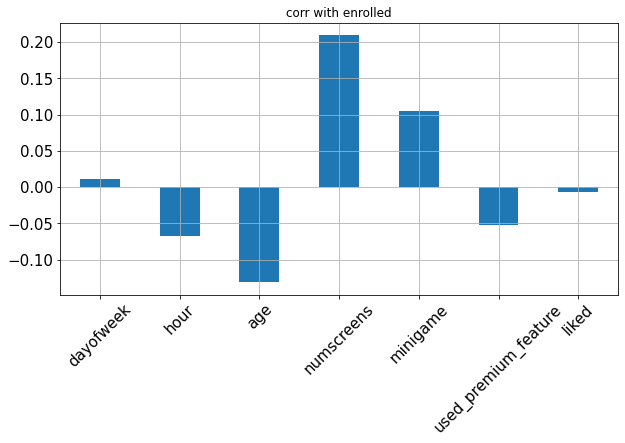

In [88]:
dataset_temp.corrwith(dataset['enrolled']).plot.bar(figsize= (10,5),
                                                    title= 'corr with enrolled',
                                                    fontsize= 15, rot= 45,
                                                    grid= True)

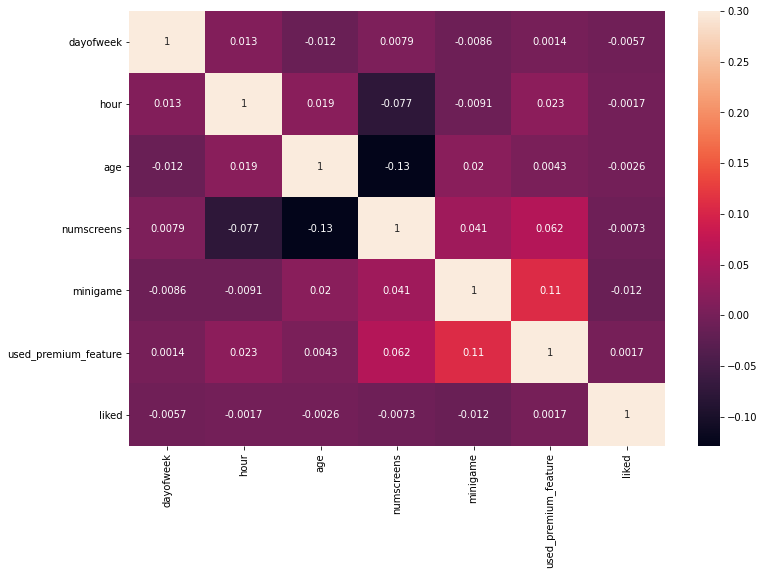

In [89]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset_temp.corr(), annot= True, vmax= 0.3)

# **Feature Engineering**

In [90]:
#converting Time data to actual time
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [91]:
dataset['first_open']= [parser.parse(row_data) for row_data in dataset['first_open']]

In [92]:
dataset['enrolled_date']= [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in dataset['enrolled_date']]

In [93]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [94]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [95]:
dataset['difference'] = (dataset['enrolled_date'] - dataset['first_open']).astype('timedelta64[h]')

In [96]:
dataset['difference'].head()

0    NaN
1    NaN
2    NaN
3    0.0
4    0.0
Name: difference, dtype: float64

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


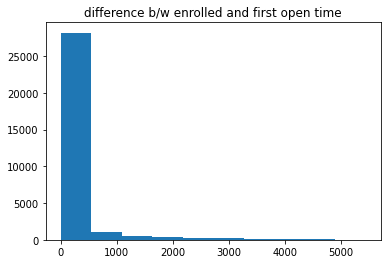

In [97]:
plt.hist(dataset['difference'])
plt.title('difference b/w enrolled and first open time')
plt.show()

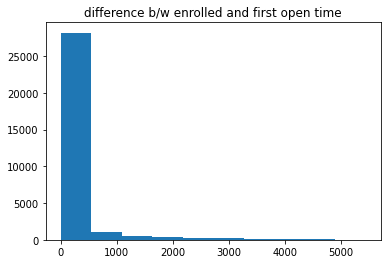

In [98]:
plt.hist(dataset['difference'].dropna())
plt.title('difference b/w enrolled and first open time')
plt.show()

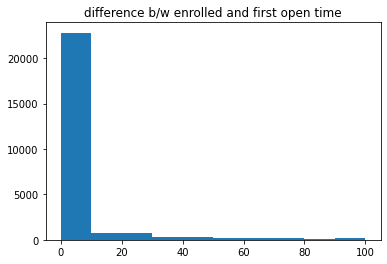

In [99]:
plt.hist(dataset['difference'].dropna(), range= (0, 100))
plt.title('difference b/w enrolled and first open time')
plt.show()

In [100]:
dataset.loc[dataset['difference']>48, 'enrolled']= 0

In [101]:
dataset['enrolled'].head()

0    0
1    0
2    0
3    1
4    1
Name: enrolled, dtype: int64

In [102]:
dataset= dataset.drop(columns= ['difference', 'first_open', 'enrolled_date'], axis= 1)

In [103]:
dataset.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


In [104]:
# Formatting the scree list which contains the list of screens accessed by use
# As no was big: top sceens viewed by the user was given as seperate dataset
top_screen= pd.read_csv('top_screens.csv').top_screens.values

In [105]:
top_screen

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [106]:
dataset['screen_list']= dataset['screen_list'].astype(str)+ ','

In [107]:
for sc in top_screen:
  dataset[sc]= dataset['screen_list'].str.contains(sc).astype(int)
  dataset['screen_list']= dataset['screen_list'].str.replace(sc+',', "")

In [108]:
dataset.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,location,Institutions,Credit3Container,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Credit3Dashboard,Loan3,CC1Category,Splash,Loan,CC1,RewardsContainer,Credit3,Credit1,EditProfile,Credit2,Finances,CC3,Saving9,Saving1,Alerts,Saving8,Saving10,Leaderboard,Saving4,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,Saving7,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,Saving2,Saving6,Saving2Amount,Saving5,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,,3,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [109]:
# Count other screens left in screen_list 
dataset['other']= dataset['screen_list'].str.count(',')

In [110]:
# Remove paren screel_list column
dataset.drop(['screen_list'], axis= 1, inplace= True)

In [111]:
#Creating funnels: Same screens that belong to the same set like Saving1, Saving2 etc.
# 1 Savings
savings_screens= ["Saving1", "Saving2", "Saving2Amount", "Saving4", "Saving5",
                  "Saving6", "Saving7", "Saving8", "Saving9", "Saving10"]
dataset['savings_count']= dataset[savings_screens].sum(axis=1)
dataset= dataset.drop(columns= savings_screens)

In [114]:
cm_screens= ["Credit1", "Credit2", "Credit3", "Credit3Container", "Credit3Dashboard"]
dataset['CMCount']= dataset[cm_screens].sum(axis=1)
dataset= dataset.drop(columns= cm_screens)

In [115]:
cc_screens= ["CC1", "CC1Category", "CC3"]
dataset['CCCount']= dataset[cc_screens].sum(axis=1)
dataset= dataset.drop(columns= cc_screens)

In [116]:
loan_screens= ["Loan", "Loan2", "Loan3", "Loan4"]
dataset['LoanCount']= dataset[loan_screens].sum(axis=1)
dataset= dataset.drop(columns= loan_screens)

In [117]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,savings_count,CMCount,CCCount,LoanCount
0,235136,3,2,23,15,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,2,0,1


In [119]:
dataset.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,savings_count,CMCount,CCCount,LoanCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,0.293660,0.524600,0.319540,0.473480,0.158040,0.423160,0.364860,0.340700,0.200760,0.084000,0.048980,0.076540,0.073720,0.051520,0.053860,0.045080,0.030920,0.041420,0.047560,0.0,0.0455,0.041060,0.024420,0.026220,0.023580,0.031760,0.022460,0.029800,0.021160,0.096560,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,0.455443,0.499399,0.466303,0.499301,0.364782,0.494065,0.481396,0.473949,0.400573,0.277391,0.215828,0.265863,0.261317,0.221058,0.225743,0.207482,0.173103,0.199262,0.212836,0.0,0.2084,0.198431,0.154351,0.159791,0.151738,0.175362,0.148176,0.170037,0.143919,0.295361,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,2

In [120]:
dataset.to_csv('new_appdata10.csv', index= False)

# **Data Preprocessing**

In [121]:
dataset_new= pd.read_csv('new_appdata10.csv')

In [122]:
response= dataset['enrolled']

In [127]:
dataset_new.drop('enrolled', axis=1, inplace=True)

In [126]:
from sklearn.model_selection import train_test_split

In [129]:
X_train, X_test, y_train, y_test= train_test_split(dataset_new, response, test_size= 0.2, random_state= 1)

In [132]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40000, 49) (10000, 49) (40000,) (10000,)


In [133]:
train_identifier= X_train['user']
X_train= X_train.drop(columns= 'user')

In [134]:
test_identifier= X_test['user']
X_test= X_test.drop(columns= 'user')

In [142]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train2= pd.DataFrame(sc.fit_transform(X_train))
X_test2= pd.DataFrame(sc.transform(X_test))

In [144]:
X_train2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,1.461526,-1.553887,-0.809274,-0.326778,-0.34787,-0.457413,-0.445576,0.96651,-0.645392,-1.050367,-0.686980,-0.946148,2.307403,-0.857574,-0.757381,1.39264,-0.503162,-0.302185,-0.224851,-0.287610,-0.281916,-0.23379,4.191671,4.584137,-0.178191,4.790835,-0.224974,0.0,-0.217955,-0.206965,-0.155553,-0.164429,-0.156058,-0.180862,-0.15163,-0.173889,-0.14779,-0.32831,-0.121616,-0.11443,-0.115768,-0.089944,-0.086637,-0.878485,4.683504,-0.762013,-0.288394,-1.166293
1,-1.491325,0.863914,-0.346435,-0.071547,-0.34787,-0.457413,-0.445576,0.96651,1.549446,0.952048,-0.686980,1.056917,-0.433388,1.166080,-0.757381,-0.71806,-0.503162,-0.302185,-0.224851,-0.287610,-0.281916,-0.23379,-0.238568,-0.218144,-0.178191,-0.208732,-0.224974,0.0,-0.217955,-0.206965,-0.155553,-0.164429,-0.156058,-0.180862,-0.15163,-0.173889,-0.14779,-0.32831,-0.121616,-0.11443,-0.115768,-0.089944,-0.086637,-0.332817,-0.262230,-0.762013,-0.288394,0.311711
2,0.969384,0.863914,-0.624139,-0.071547,-0.34787,-0.457413,-0.445576,-1.03465,-0.645392,0.952048,1.455647,-0.946148,-0.433388,1.166080,-0.757381,-0.71806,-0.503162,-0.302185,-0.224851,-0.287610,-0.281916,-0.23379,-0.238568,-0.218144,-0.178191,-0.208732,-0.224974,0.0,-0.217955,-0.206965,-0.155553,-0.164429,-0.156058,-0.180862,-0.15163,-0.173889,-0.14779,-0.32831,-0.121616,-0.11443,-0.115768,-0.089944,-0.086637,0.758520,-0.262230,1.706311,-0.288394,0.311711
3,-0.999183,-0.344987,1.690057,-0.582008,-0.34787,-0.457413,-0.445576,-1.03465,-0.645392,-1.050367,-0.686980,1.056917,-0.433388,-0.857574,-0.757381,-0.71806,-0.503162,-0.302185,-0.224851,-0.287610,-0.281916,-0.23379,4.191671,-0.218144,-0.178191,-0.208732,-0.224974,0.0,-0.217955,-0.206965,-0.155553,-0.164429,-0.156058,-0.180862,-0.15163,-0.173889,-0.14779,-0.32831,-0.121616,-0.11443,-0.115768,-0.089944,-0.086637,-0.878485,-0.262230,1.706311,1.340722,-1.166293
4,0.969384,0.057980,-0.716706,1.140796,-0.34787,-0.457413,-0.445576,0.96651,-0.645392,0.952048,-0.686980,1.056917,-0.433388,1.166080,1.320339,1.39264,-0.503162,-0.302185,-0.224851,3.476925,-0.281916,-0.23379,-0.238568,-0.218144,-0.178191,-0.208732,-0.224974,0.0,-0.217955,-0.206965,-0.155553,-0.164429,-0.156058,-0.180862,-0.15163,-0.173889,-0.14779,-0.32831,-0.121616,-0.11443,-0.115768,-0.089944,-0.086637,1.577022,-0.262230,0.060762,-0.288394,0.311711


In [146]:
X_train2.columns= X_train.columns.values
X_test2.columns= X_test.columns.values
X_train2.index= X_train.index.values
X_test2.index= X_test.index.values
X_train= X_train2
X_test= X_test2

In [147]:
X_train.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,savings_count,CMCount,CCCount,LoanCount
18165,1.461526,-1.553887,-0.809274,-0.326778,-0.34787,-0.457413,-0.445576,0.96651,-0.645392,-1.050367,-0.686980,-0.946148,2.307403,-0.857574,-0.757381,1.39264,-0.503162,-0.302185,-0.224851,-0.287610,-0.281916,-0.23379,4.191671,4.584137,-0.178191,4.790835,-0.224974,0.0,-0.217955,-0.206965,-0.155553,-0.164429,-0.156058,-0.180862,-0.15163,-0.173889,-0.14779,-0.32831,-0.121616,-0.11443,-0.115768,-0.089944,-0.086637,-0.878485,4.683504,-0.762013,-0.288394,-1.166293
36059,-1.491325,0.863914,-0.346435,-0.071547,-0.34787,-0.457413,-0.445576,0.96651,1.549446,0.952048,-0.686980,1.056917,-0.433388,1.166080,-0.757381,-0.71806,-0.503162,-0.302185,-0.224851,-0.287610,-0.281916,-0.23379,-0.238568,-0.218144,-0.178191,-0.208732,-0.224974,0.0,-0.217955,-0.206965,-0.155553,-0.164429,-0.156058,-0.180862,-0.15163,-0.173889,-0.14779,-0.32831,-0.121616,-0.11443,-0.115768,-0.089944,-0.086637,-0.332817,-0.262230,-0.762013,-0.288394,0.311711
13242,0.969384,0.863914,-0.624139,-0.071547,-0.34787,-0.457413,-0.445576,-1.03465,-0.645392,0.952048,1.455647,-0.946148,-0.433388,1.166080,-0.757381,-0.71806,-0.503162,-0.302185,-0.224851,-0.287610,-0.281916,-0.23379,-0.238568,-0.218144,-0.178191,-0.208732,-0.224974,0.0,-0.217955,-0.206965,-0.155553,-0.164429,-0.156058,-0.180862,-0.15163,-0.173889,-0.14779,-0.32831,-0.121616,-0.11443,-0.115768,-0.089944,-0.086637,0.758520,-0.262230,1.706311,-0.288394,0.311711
32985,-0.999183,-0.344987,1.690057,-0.582008,-0.34787,-0.457413,-0.445576,-1.03465,-0.645392,-1.050367,-0.686980,1.056917,-0.433388,-0.857574,-0.757381,-0.71806,-0.503162,-0.302185,-0.224851,-0.287610,-0.281916,-0.23379,4.191671,-0.218144,-0.178191,-0.208732,-0.224974,0.0,-0.217955,-0.206965,-0.155553,-0.164429,-0.156058,-0.180862,-0.15163,-0.173889,-0.14779,-0.32831,-0.121616,-0.11443,-0.115768,-0.089944,-0.086637,-0.878485,-0.262230,1.706311,1.340722,-1.166293
41133,0.969384,0.057980,-0.716706,1.140796,-0.34787,-0.457413,-0.445576,0.96651,-0.645392,0.952048,-0.686980,1.056917,-0.433388,1.166080,1.320339,1.39264,-0.503162,-0.302185,-0.224851,3.476925,-0.281916,-0.23379,-0.238568,-0.218144,-0.178191,-0.208732,-0.224974,0.0,-0.217955,-0.206965,-0.155553,-0.164429,-0.156058,-0.180862,-0.15163,-0.173889,-0.14779,-0.32831,-0.121616,-0.11443,-0.115768,-0.089944,-0.086637,1.577022,-0.262230,0.060762,-0.288394,0.311711


# **Model Building**

In [156]:
from sklearn.linear_model import LogisticRegression
#L1 penalty/ Lasso Regression: it penalises any particular field that is strongly correlated to the response variable
classifier= LogisticRegression(random_state=0, penalty= 'l1', solver= 'saga')


In [158]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [159]:
y_pred= classifier.predict(X_test)

In [171]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [163]:
cm= confusion_matrix(y_test, y_pred)

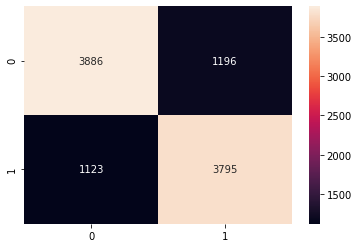

In [173]:
sns.heatmap(cm, annot= True, fmt= 'g')

In [167]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      5082
           1       0.76      0.77      0.77      4918

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



In [172]:
print(accuracy_score(y_test, y_pred))

0.7681


In [180]:
# K_fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(classifier, X_train, y_train, cv= 10)

In [181]:
print(accuracies.mean(), accuracies.std())

0.767425 0.00603950536054073


# **Final Results**

In [182]:
final_results= pd.concat([y_test, test_identifier], axis=1).dropna()

In [183]:
final_results['predicted results']= y_pred

In [194]:
final_results= final_results[['user', 'enrolled', 'predicted results']].reset_index(drop= True)

In [195]:
final_results.to_csv('Final Predictions.csv')

In [196]:
final_results.head()

,user,enrolled,predicted results
0,356839,1,1
1,50476,1,1
2,139338,0,0
3,21025,1,1
4,53743,0,1
